In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits

In [2]:
data = pd.read_csv("./AirbnbData/Asheville/reviews.csv")
data.head()
cols = ['dateindex'] + list(data.columns)
data.index += 1
data['dateindex'] = data.index
data2 = data[cols]
print(data2)
data2.to_csv(r'./AirbnbData/Asheville/reviews_index.csv')

        dateindex  listing_id        date
1               1      108061  2011-09-21
2               2      108061  2011-11-01
3               3      108061  2011-11-13
4               4      108061  2012-07-21
5               5      108061  2012-08-19
...           ...         ...         ...
168268     168268    45773379  2020-10-18
168269     168269    45773379  2020-10-20
168270     168270    45784291  2020-10-11
168271     168271    45813359  2020-10-20
168272     168272    45822593  2020-10-18

[168272 rows x 3 columns]


In [3]:
data = data2
data.describe()

,dateindex,listing_id
count,168272.000000,1.682720e+05
mean,84136.500000,1.794242e+07
std,48576.086586,1.112661e+07
min,1.000000,1.080610e+05
25%,42068.750000,8.265544e+06
50%,84136.500000,1.778793e+07
75%,126204.250000,2.525163e+07
max,168272.000000,4.582259e+07


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

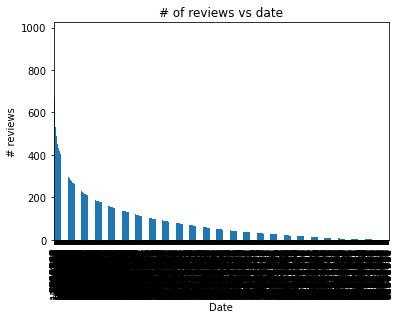

In [4]:
data['listing_id'].value_counts().plot(kind='bar')
plt.title('# of reviews vs date')
plt.xlabel('Date')
plt.ylabel('# reviews')
sns.despine

In [5]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
reg = LinearRegression()

labels = data['listing_id']
train1 = data['dateindex']
print(train1[5])
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)
print(x_train.shape)
print(y_train.shape)
x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
print(x_train.shape)
print(y_train.shape)
x_test = np.array(x_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
print(x_test.shape)
print(y_test.shape)

print(x_train[1])

5
(151444,)
(151444,)
(151444, 1)
(151444, 1)
(16828, 1)
(16828, 1)
[31135]


In [6]:
reg.fit(x_train, y_train)
reg.score(x_test,y_test)

0.9805314462679745

In [7]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [8]:
clf.fit(x_train, y_train)

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [9]:
clf.score(x_test,y_test)

0.999999467570773

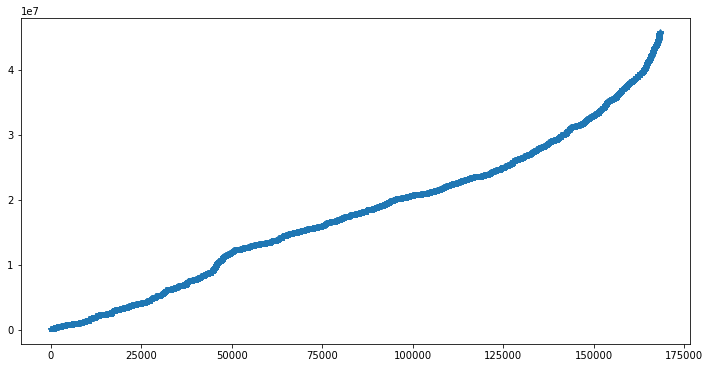

In [10]:
y_pred = clf.predict(x_test)

plt.figure(figsize=(12, 6))
plt.plot(x_test, y_pred,'*',label= 'Set dev train')

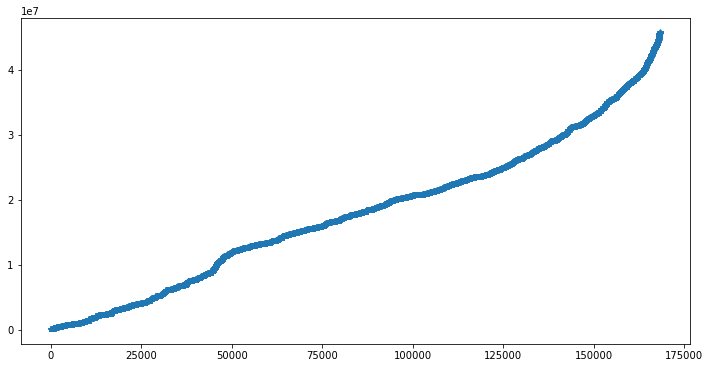

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(x_test, y_test,'*',label= 'Set dev train')

In [74]:
print(x_test[0])
print(y_test[0])

[155366]
[35493650]
